In [1]:
simple_grammar = """
    sentence => noun_phrase verb_phrase
    noun_phrase => Article Adj* noun
    Adj* => null | Adj Adj*
    verb_phrase => verb noun_phrase
    Article =>  一个 | 这个
    noun =>   女人 |  篮球 | 桌子 | 小猫
    verb =>  看着  |  坐在 |  听着 | 看见
    Adj =>  蓝色的 | 好看的 | 小小的
    """

In [2]:
def create_grammar(grammar_str,split='=>'):
    grammar = {}
    for line in grammar_str.split('\n'):
        if not line.strip(): continue

        exp,stmt = line.split(split)
        grammar[exp.strip()] = [t.split() for t in stmt.split('|')]
    return grammar

In [3]:
create_grammar(simple_grammar)

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [4]:
import random

In [5]:
def generate(gram,target):
    if target  not in gram: return target
    
    new_target = [generate(gram,t) for t in random.choice(gram[target])]
    return ''.join([e for e in new_target if e != 'null'])
    

In [6]:
adj = create_grammar(simple_grammar)

In [7]:
adj


{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [8]:
generate(create_grammar(simple_grammar),target='sentence')

'这个好看的篮球看着一个好看的小小的好看的篮球'

In [6]:
import pandas as pd

filename = 'F:/NLP/datasource-master/datasource/sqlResult_1558435.csv'
content =pd.read_csv(filename,encoding='gb18030')
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [ ]:
import pandas as pd

filename = 'F:/NLP/datasource-master/datasource/train.txt'
content1 =open(filename,'r',encoding='utf-8')

In [137]:
train = []
for line in content1:
    train.append(line)
   

In [138]:
train[:10]

['0 ++$++ disability-insurance ++$++ 法律要求残疾保险吗？ ++$++ Is  Disability  Insurance  Required  By  Law?\n',
 '1 ++$++ life-insurance ++$++ 债权人可以在死后人寿保险吗？ ++$++ Can  Creditors  Take  Life  Insurance  After  Death?\n',
 '2 ++$++ renters-insurance ++$++ 旅行者保险有租赁保险吗？ ++$++ Does  Travelers  Insurance  Have  Renters  Insurance?\n',
 '3 ++$++ auto-insurance ++$++ 我可以开一辆没有保险的新车吗？ ++$++ Can  I  Drive  A  New  Car  Home  Without  Insurance?\n',
 '4 ++$++ life-insurance ++$++ 人寿保险的现金转出价值是否应纳税？ ++$++ Is  The  Cash  Surrender  Value  Of  Life  Insurance  Taxable?\n',
 '5 ++$++ annuities ++$++ 如何报告年金收入？ ++$++ How  Is  Annuity  Income  Reported?\n',
 '6 ++$++ home-insurance ++$++ AAA家庭保险涵盖什么？ ++$++ What  Does  AAA  Home  Insurance  Cover?\n',
 '7 ++$++ retirement-plans ++$++ 什么是简单的退休计划？ ++$++ What  Is  A  Simple  Retirement  Plan?\n',
 '8 ++$++ disability-insurance ++$++ 社会保险残疾保险是什么？ ++$++ What  Does  Social  Security  Disability  Insurance  Cover?\n',
 '9 ++$++ auto-insurance ++$++ 汽车保险是否预付？ ++$++ Is  C

In [172]:
line = []
import re
for i in range(len(train)):
    t = re.compile('[\u4E00-\u9FA5]')
    line.append(t.findall(train[i]))
lines = []
for i in range(len(line)):
    f = ''.join(line[i])
    #print(f)
    lines.append(f)      

In [176]:
len(lines)


12889

In [7]:
articles = content['content'].tolist()

In [8]:
articles[:5]


['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n',
 '此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n至于电池缩水，可能与刘作虎所说，一加手机5要做市面最轻薄大屏旗舰的设定有关。\r\n按照目前掌握的资料，一加手机5拥有5.5寸1080P三星AMOLED显示屏、6G/8GB RAM，64GB/128GB ROM，双1600万摄像头，备货量“惊喜”。\r\n根据京东泄露的信息，一加5起售价是xx99元，应该是在2799/2899/2999中的某个。\r\n',
 '这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n',
 '（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说

In [12]:
import re

In [11]:
def token(string):
    return re.findall('\w+',string)

In [10]:
article_clean = [''.join(token(str(a)))for a in articles]

NameError: name 'token' is not defined

In [9]:
article_clean[:5]

NameError: name 'article_clean' is not defined

In [16]:
from functools import reduce

In [17]:
from operator import add,mul

In [18]:
reduce(add,[1,2,3,4,5,6])

21

In [73]:
with open('clean_data.txt','w') as f:
    for a in article_clean:
        f.write(a + '\n' )

In [61]:
import jieba

In [62]:
def cuting(string): return list(jieba.cut(string))

In [63]:
Token = []


In [77]:
for i,line in enumerate((open('clean_data.txt')):
    if i % 100 == 0: print(i
    
    #if i >5: break
    Token += cuting(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [78]:
from collections import Counter

In [79]:
words_count = Counter(Token)

In [81]:
words_count.most_common(100)

[('的', 732633),
 ('n', 382020),
 ('在', 271035),
 ('月', 191615),
 ('日', 167866),
 ('新华社', 142574),
 ('和', 138365),
 ('了', 128553),
 ('年', 124939),
 ('是', 105697),
 ('１', 88370),
 ('０', 85171),
 ('外代', 83268),
 ('中', 75558),
 ('中国', 72641),
 ('２', 70698),
 ('2017', 70219),
 ('将', 63577),
 ('记者', 63033),
 ('二线', 62012),
 ('等', 59911),
 ('与', 59854),
 ('为', 58711),
 ('5', 55247),
 ('照片', 52349),
 ('4', 52102),
 ('对', 52009),
 ('也', 49927),
 ('上', 49068),
 ('有', 48153),
 ('５', 40942),
 ('说', 40042),
 ('他', 38964),
 ('发展', 38311),
 ('以', 37607),
 ('３', 37054),
 ('国际', 36225),
 ('nn', 35330),
 ('４', 34713),
 ('比赛', 32589),
 ('到', 31500),
 ('人', 30835),
 ('从', 30711),
 ('６', 30660),
 ('6', 30487),
 ('都', 29779),
 ('不', 29555),
 ('后', 28526),
 ('就', 28234),
 ('并', 27719),
 ('当日', 27222),
 ('国家', 26898),
 ('进行', 26858),
 ('被', 26816),
 ('企业', 26791),
 ('７', 26473),
 ('3', 26070),
 ('美国', 25914),
 ('北京', 25740),
 ('举行', 25504),
 ('这', 25442),
 ('体育', 24952),
 ('2', 24833),
 ('1', 24723),
 ('但', 2

In [27]:
frequiences = [f for w,f in words_count.most_common(100)]

In [28]:
x = [i for i in range(100)]

In [29]:
import matplotlib.pyplot as plt

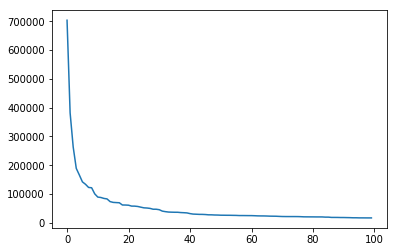

In [30]:
plt.plot(x,frequiences)

In [31]:
import numpy as np

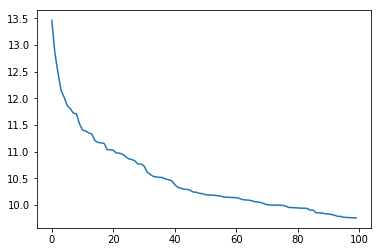

In [32]:
plt.plot(x,np.log(frequiences))

In [33]:
def prob_1(word):
    return words_count[word] / len(Token)

In [38]:
prob_1('我们')

0.0011341645999654677

In [39]:
prob_1('洗澡')

5.732690651411882e-06

In [40]:
Token[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [34]:
TOKEN = [str(t) for t in Token]

In [35]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [37]:
TOKEN_3_GRAM = [''.join(TOKEN[i:i+3]) for i in range(len(TOKEN[:-3]))]

In [43]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [38]:
TOKEN_3_GRAM[:10]

['此外自本周',
 '自本周6',
 '本周6月',
 '6月12',
 '月12日起',
 '12日起除',
 '日起除小米',
 '除小米手机',
 '小米手机6',
 '手机6等']

In [39]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [40]:
words_count_3 = Counter(TOKEN_3_GRAM)

In [41]:
def prob_2(word1,word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM) 

In [42]:
def prob_3(word1,word2,word3):
    if word1 + word2 + word3 in words_count_3: return words_count_3[word1+word2+word3] / len(TOKEN_3_GRAM)
    else:
        return 1 / len(TOKEN_3_GRAM)

In [46]:
prob_2('一起','吃饭')

6.811118378826685e-07

In [47]:
prob_2('去','吃饭')

7.946304775297799e-07

In [48]:
prob_2('上课','吃饭')

5.6759319823555707e-08

In [49]:
prob_2('洋葱','奶昔')

5.6759319823555707e-08

In [43]:
def get_probility(sentence):
    words = cuting(sentence)
    sentence_pro = 1
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probility = prob_2(word,next_)
        #print(type(probility))
        
        sentence_pro *= probility
        
    return sentence_pro

In [44]:
def get_probility1(sentence):
    words = cuting(sentence)
    sentence_pro = 1
    for i,word in enumerate(words[:-2]):
        next_1 = words[i+1]
        next_2 = words[i+2]
        
        probility = prob_3(word,next_1,next_2)
        #print(type(probility))
        
        sentence_pro *= probility
        
    return sentence_pro

In [45]:
get_probility('洋葱奶昔来一杯')

1.8285698188632354e-22

In [52]:
get_probility('养乐多绿来一杯')

3.2216203868326836e-15

In [46]:
get_probility1('洋葱奶昔来一杯')

3.221620752546679e-15

In [47]:
get_probility1('养乐多绿来一杯')

5.6759323045176277e-08

In [52]:
get_probility('小明今天抽奖抽到一台苹果手机')

1.5046504121058867e-42

In [54]:
get_probility1('小明今天抽奖抽到一台苹果手机')

5.890959479030824e-37

In [53]:
get_probility('小明今天抽奖抽到一架波音飞机')

1.1234723077057287e-41

In [55]:
get_probility1('小明今天抽奖抽到一架波音飞机')

1.1781918958061648e-36

In [55]:
for sen in [generate(gram=adj,target='sentence') for i in range(10)]:
    print('sentence:{} with prob {}'.format(sen,get_probility(sen)))

sentence:这个好看的小小的小小的女人坐在一个小小的篮球 with prob 1.9369562653879352e-62
sentence:这个篮球看着这个桌子 with prob 1.2454605500227163e-28
sentence:一个篮球看着一个小猫 with prob 1.037883791685597e-29
sentence:一个小小的小猫看见这个女人 with prob 1.0368085740666274e-34
sentence:一个好看的小小的小小的小猫看见这个桌子 with prob 2.06822930888385e-56
sentence:这个好看的小小的篮球看见一个蓝色的女人 with prob 1.4380432879395277e-60
sentence:这个蓝色的好看的好看的小小的好看的蓝色的小小的桌子坐在一个小小的小小的桌子 with prob 5.525377554474036e-119
sentence:这个蓝色的小小的篮球听着一个篮球 with prob 3.5811605923876876e-53
sentence:这个好看的蓝色的小小的蓝色的蓝色的桌子看着一个女人 with prob 2.2482632899638216e-82
sentence:这个蓝色的小猫坐在一个女人 with prob 2.888928791243303e-39


In [51]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃牛排 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probility1(s1), get_probility1(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃牛排 with probility 6.114132748898668e-66
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 6.114132748898668e-66
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.037884027323943e-29
---- 真是一只好看的小猫 with probility 1.8285701302284085e-22
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 3.221620752546679e-15
---- 今晚火锅去吃我 with probility 1.8285701302284085e-22
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 3.221620752546679e-15
---- 养乐多绿来一杯 with probility 5.6759323045176277e-08
